# Machine Learning Examples using Real Market Returns
- Predicting tomorrow's excess return using today's industry returns
- Intuition: there might be some industries whose returns are leading indicators of overall market movements
- Return data collected from CRSP, includes all firms incorporated in the US and listed on NYSE, AMEX or NASDAQ
- Fama-French 49 industry classifications

## OLS Regression

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [11]:
df = pd.read_csv('Stock Return Data.csv')

df['Mkt_rf_lead'] = df['Mkt_rf'].shift(-1) #leading (one-day) market excess return
df.dropna(inplace=True)
df.head()

,Date,Mkt_rf,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,...,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other,Mkt_rf_lead
0,19700102,1.18,3.05,0.83,0.18,0.43,0.00,2.27,2.20,-0.04,...,3.68,2.18,0.13,1.62,0.44,1.61,3.88,0.82,4.84,0.59
1,19700105,0.59,3.67,0.71,-0.68,0.37,1.38,0.30,-0.47,-0.26,...,1.53,1.33,-0.45,0.25,0.64,1.65,2.49,-0.29,5.07,-0.74
2,19700106,-0.74,1.38,-0.38,0.32,0.12,0.05,-1.73,-0.02,-0.91,...,-0.93,-0.78,0.27,-1.22,-0.66,-0.96,-2.06,-1.00,-0.05,-0.15
3,19700107,-0.15,0.37,0.08,0.10,1.15,0.17,0.63,0.79,-0.57,...,-0.19,0.13,0.43,0.18,-0.19,-0.32,-0.19,-0.29,1.99,0.04
4,19700108,0.04,0.15,-0.08,-0.21,-0.18,-1.66,-0.83,0.36,-0.24,...,-0.66,-0.55,0.14,-0.08,1.16,0.43,-0.70,-0.20,-1.89,-0.31


In [24]:
x = np.array(df.drop(['Date','Mkt_rf','Mkt_rf_lead'],axis=1)) #49 industries
y = np.asarray(df['Mkt_rf_lead'])

reg = LinearRegression().fit(x, y)

y_pred = reg.predict(x)

#Manually compute RMSE
diff = y-y_pred
diff_sq = np.square(diff)
n = len(y)
mse = np.sum(diff_sq)/n
rmse = np.sqrt(mse)
print('The root mean squared error is:',rmse)

The root mean squared error is: 1.0138653265702653


1.0138653265702653

In [23]:
#Check using SKLearn
mse_check = mean_squared_error(y,y_pred)
rmse_check = np.sqrt(mse_check)
rmse_check

1.0138653265702653

## Shrinkage Estimators: Lasso & Ridge

In [29]:
#Lasso
lasso = Lasso(alpha=1).fit(x,y)
y_pred = lasso.predict(x)
mse1 = mean_squared_error(y,y_pred)
print('MSE with alpha = 1:\t',mse1)

lasso = Lasso(alpha=.1).fit(x,y)
y_pred = lasso.predict(x)
mse2 = mean_squared_error(y,y_pred)
print('MSE with alpha = 0.1:\t',mse2)

lasso = Lasso(alpha=.01).fit(x,y)
y_pred = lasso.predict(x)
mse3 = mean_squared_error(y,y_pred)
print('MSE with alpha = 0.01:\t',mse3)

#Ridge
ridge = Ridge(alpha=1).fit(x,y)
y_pred = ridge.predict(x)
mse4 = mean_squared_error(y,y_pred)
print('MSE with alpha = 1:\t',mse4)

ridge = Ridge(alpha=.1).fit(x,y)
y_pred = ridge.predict(x)
mse5 = mean_squared_error(y,y_pred)
print('MSE with alpha = 0.1:\t',mse5)

ridge = Ridge(alpha=.01).fit(x,y)
y_pred = ridge.predict(x)
mse6 = mean_squared_error(y,y_pred)
print('MSE with alpha = 0.01:\t',mse6)

MSE with alpha = 1:	 1.0503518694865406
MSE with alpha = 0.1:	 1.0496251769116054
MSE with alpha = 0.01:	 1.0312636277086589
MSE with alpha = 1:	 1.0279229007247566
MSE with alpha = 0.1:	 1.0279229004244654
MSE with alpha = 0.01:	 1.0279229004214612


We can see that error decreases as penalty or alpha decreases for both LASSO and RIDGE.

## Decision Trees / Random Forests

In [31]:
#Decision Trees
import sklearn.tree
import matplotlib
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [35]:
dtr = DecisionTreeRegressor(random_state=42, min_samples_leaf=100)
dtr.fit(x,y)

y_pred_dt = dtr.predict(x)

msedt = mean_squared_error(y,y_pred_dt)
print('The MSE for the decision tree is:',msedt)

The MSE for the decision tree is: 0.9718440195526606


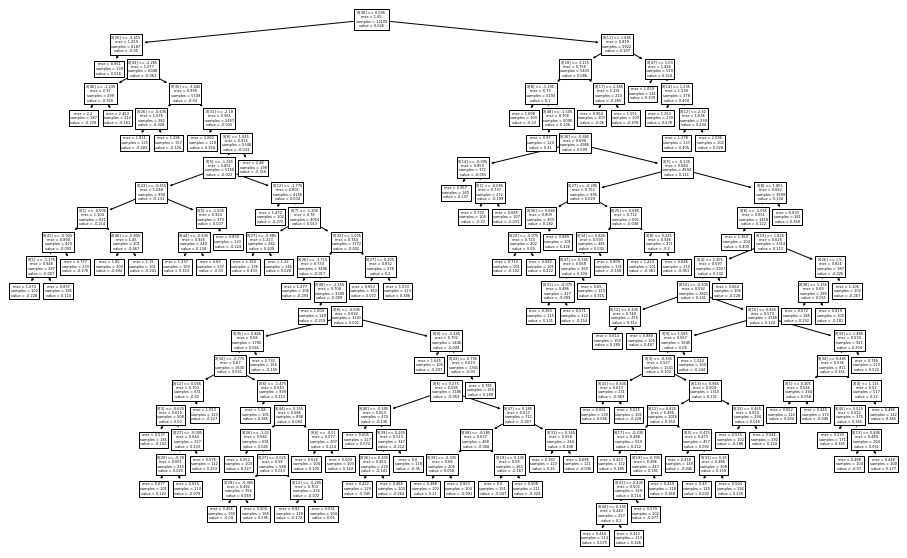

The depth of the tree is 21 the maximum distance between the root and any leaf.


In [42]:
#Plot of the decision tree
plt.figure(figsize=(16,10))
sklearn.tree.plot_tree(dtr)
plt.show()
print('The depth of the tree is', dtr.get_depth(), 'the maximum distance between the root and any leaf.')

In [44]:
#Random Forest
rfr = RandomForestRegressor(random_state=42, n_estimators=100, min_samples_leaf=100, max_features='sqrt')
rfr.fit(x,y.ravel())

y_pred_rf = rfr.predict(x)

mserf = mean_squared_error(y,y_pred_rf)
print('The MSE for the random forest is:',mserf)

The MSE for the random forest is: 0.9814334662236628


The mean squared error is slightly higher for our random forest vs our basic decision tree regression. 

## Deep Learning / Neural Networks

In [45]:
from sklearn.neural_network import MLPRegressor

mlpr = MLPRegressor(random_state=42, solver='sgd', max_iter=10000, 
                    activation='relu', hidden_layer_sizes=(20,10,3))
mlpr.fit(x,y.ravel())

y_pred_mlp = mlpr.predict(x)
#print(y_pred_mlp)

msemlp = mean_squared_error(y,y_pred_mlp)
print('Neural Net MSE:', msemlp)

Neural Net MSE: 0.8260754410623826


##### A very basic example of the above regressions yields the following results:

In [51]:
print('OLS Regression MSE\t\t\t',mse)
print('LASSO Regression MSE\t\t\t',mse3)
print('RIDGE Regression MSE\t\t\t',mse6)
print('Decision Tree Regression MSE\t\t',msedt)
print('Random Forest Regression MSE\t\t',mserf)
print('Multi-layer Perceptron Regression MSE\t',msemlp)

OLS Regression MSE			 1.0279229004214308
LASSO Regression MSE			 1.0312636277086589
RIDGE Regression MSE			 1.0279229004214612
Decision Tree Regression MSE		 0.9718440195526606
Random Forest Regression MSE		 0.9814334662236628
Multi-layer Perceptron Regression MSE	 0.8260754410623826
